## Data Analytics of NY Airbnb data

The purpose of this project is for you to show off your technical skills, but more importantly for you to begin putting together a portfolio that shows your ability to effectively communicate technical results.



## Table of Contents
- [Data Loading (Python)](#descriptive)
- [Data Cleaning](#probability)
- [Data Transformation](#experimentation)
- [Data Visualization](#algorithms)


<a id='intro'></a>
### Introduction

For this project, you will pick a dataset. Inspired by Robert, there are a few public datasets from Airbnb available below, but you may also choose a dataset similar to what was used in the lessons, or an entirely different dataset. Using your dataset, you will choose 3 questions you aspire to answer from the data.

Data Loading
#### Part I - Data Loading

To get started, let's import our libraries.

In [90]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = 10,6

In [91]:
df = pd.read_csv('Airbnb_Open_Data.csv')
df.head()    # Display the first 5 rows

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,07/05/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [92]:
# Display the last ros of dataset

df.tail()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,...,$169,1.0,0.0,NaN,NaN,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...,NaN
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,...,$167,1.0,1.0,07/06/2015,0.02,2.0,2.0,395.0,House rules: Guests agree to the following ter...,NaN
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,...,$198,3.0,0.0,NaN,NaN,5.0,1.0,342.0,NaN,NaN
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,...,$109,2.0,5.0,10/11/2015,0.10,3.0,1.0,386.0,NaN,NaN
102598,6094647,585 sf Luxury Studio,68170633372,unconfirmed,Rebecca,Manhattan,Upper West Side,40.76807,-73.98342,United States,...,$206,1.0,0.0,NaN,NaN,3.0,1.0,69.0,NaN,NaN


In [93]:
df.shape [0]

102599

In [94]:
df.info()   # Do any of the rows have missing values?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [95]:
df.info(memory_usage='deep')  # Recognize that all of your columns are of a **categorical data type** with the exception of one.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

<a id='Data Cleaning'></a>
#### Part II - Data Cleaning

In [96]:
print('Number of rows:', len(df)) 
print('Number of columns:',len(df.columns))
print('Column names:', df.columns)

Number of rows: 102599
Number of columns: 26
Column names: Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room_type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')


Dropped Unwanted columns 

In [97]:
data = df.drop(['id', 'host id', 'NAME' , 'host name','lat', 'long', 'country', 'country code', 'house_rules', 'license'], axis=1)
data.head ()

,host_identity_verified,neighbourhood group,neighbourhood,instant_bookable,cancellation_policy,room_type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,unconfirmed,Brooklyn,Kensington,False,strict,Private room,2020.0,$966,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0
1,verified,Manhattan,Midtown,False,moderate,Entire home/apt,2007.0,$142,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0
2,NaN,Manhattan,Harlem,True,flexible,Private room,2005.0,$620,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0
3,unconfirmed,Brooklyn,Clinton Hill,True,moderate,Entire home/apt,2005.0,$368,$74,30.0,270.0,07/05/2019,4.64,4.0,1.0,322.0
4,verified,Manhattan,East Harlem,False,moderate,Entire home/apt,2009.0,$204,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0


Number of Rows and Columns after dropping 

In [98]:
print('Number of rows:', len(data))             
print('Number of columns:',len(data.columns))   
print('Column names:', data.columns)

Number of rows: 102599
Number of columns: 16
Column names: Index(['host_identity_verified', 'neighbourhood group', 'neighbourhood',
       'instant_bookable', 'cancellation_policy', 'room_type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365'],
      dtype='object')


Check for missing Values if any in dataset and do the analysis

In [99]:
checkMissing = df.isna().sum()
checkMissing = checkMissing[checkMissing != 0].sort_values()
print('Missing Values are:' ,checkMissing)

Missing Values are: long                                   8
lat                                    8
neighbourhood                         16
neighbourhood group                   29
cancellation_policy                   76
instant_bookable                     105
country code                         131
number of reviews                    183
Construction year                    214
price                                247
NAME                                 250
service fee                          273
host_identity_verified               289
calculated host listings count       319
review rate number                   326
host name                            406
minimum nights                       409
availability 365                     448
country                              532
reviews per month                  15879
last review                        15893
house_rules                        52131
license                           102597
dtype: int64


Checking proportion and percentage of missing values

In [100]:
missingValues = data.isna()
missingCount = missingValues.sum().sort_values(ascending=False)

proportion = missingValues.sum() / len(data)
proportionCount = proportion.sort_values(ascending=False)

percentage = proportion * 100
percentageCount = round(percentage.sort_values(ascending=False), 2)

tableValues = pd.concat([missingCount, proportionCount, percentageCount], axis=1)
tableValues.columns = ['Missing Count', 'Proportion', 'Percentage%']
tableValues

,Missing Count,Proportion,Percentage%
last review,15893,0.154904,15.49
reviews per month,15879,0.154768,15.48
availability 365,448,0.004367,0.44
minimum nights,409,0.003986,0.40
review rate number,326,0.003177,0.32
calculated host listings count,319,0.003109,0.31
host_identity_verified,289,0.002817,0.28
service fee,273,0.002661,0.27
price,247,0.002407,0.24
Construction year,214,0.002086,0.21


Checking for any duplicate

In [101]:
data.duplicated().sum()

np.int64(3636)

In [102]:
#Number of rows and clumns before remove duplication

data.shape 

(102599, 16)

In [103]:
data.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
102594     True
102595     True
102596     True
102597     True
102598     True
Length: 102599, dtype: bool

In [104]:
data = data.drop_duplicates()

In [105]:
#Number of rows and clumns after remove duplication

data.shape 

(98963, 16)


#### Part III - Data Transformation

Converting all column names to lowercase and replace the spaces with _

In [106]:
for column in data.columns:
    new_column = column.lower().replace(" ", "_")
    data.rename(columns={column: new_column}, inplace=True)


In [107]:
data.columns

Index(['host_identity_verified', 'neighbourhood_group', 'neighbourhood',
       'instant_bookable', 'cancellation_policy', 'room_type',
       'construction_year', 'price', 'service_fee', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'review_rate_number', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98963 entries, 0 to 102057
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_identity_verified          98674 non-null  object 
 1   neighbourhood_group             98934 non-null  object 
 2   neighbourhood                   98947 non-null  object 
 3   instant_bookable                98858 non-null  object 
 4   cancellation_policy             98887 non-null  object 
 5   room_type                       98963 non-null  object 
 6   construction_year               98749 non-null  float64
 7   price                           98716 non-null  object 
 8   service_fee                     98690 non-null  object 
 9   minimum_nights                  98565 non-null  float64
 10  number_of_reviews               98783 non-null  float64
 11  last_review                     83611 non-null  object 
 12  reviews_per_month               8362

In [109]:
cols = ['price', 'service fee']
df[cols] = df[cols].replace({'\$': '', ',': ''}, regex=True).astype(float)
df.loc[:, ['price', 'service fee']].head(2)

,price,service fee
0,966.0,193.0
1,142.0,28.0


In [110]:
df.loc[:, ['price', 'service fee']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   price        102352 non-null  float64
 1   service fee  102326 non-null  float64
dtypes: float64(2)
memory usage: 1.6 MB


List the count of various room types avaliable with Airnb

In [138]:
data['room_type'].value_counts()

room_type
Entire home/apt    51908
Private room       44796
Shared room         2144
Hotel room           115
Name: count, dtype: int64

In [112]:
data.groupby(['room_type','cancellation_policy'])['cancellation_policy'].count() #Which room type has a stricter cancellation policy?

room_type        cancellation_policy
Entire home/apt  flexible               17339
                 moderate               17312
                 strict                 17207
Hotel room       flexible                  44
                 moderate                  37
                 strict                    34
Private room     flexible               14801
                 moderate               15071
                 strict                 14901
Shared room      flexible                 711
                 moderate                 713
                 strict                   717
Name: cancellation_policy, dtype: int64

In [113]:
# Identify the room type with the strictest cancellation policy
strict_cancellation = data[data['cancellation_policy'] == 'strict']['room_type'].value_counts().idxmax()
print(strict_cancellation)

Entire home/apt


Based on the previous result, the room type with the strictest cancellation policy is "Entire home/apt." However, this might be because it is the most common room type. Let’s analyze the proportions to confirm.

In [114]:
# Get the percentages of room types for each cancellation policy type
totalRooms = data['room_type'].value_counts()
strictTotalRoomsType = data[data['cancellation_policy'] == 'strict']['room_type'].value_counts()
percStrictTotalRoomsType = round(((strictTotalRoomsType / totalRooms) * 100), 2).sort_values(ascending=False)
print("Percentage of room types with strict cancellation policy:")
print(percStrictTotalRoomsType)

Percentage of room types with strict cancellation policy:
room_type
Shared room        33.44
Private room       33.26
Entire home/apt    33.15
Hotel room         29.57
Name: count, dtype: float64


It is obvious from the above analysis that the highest percentage of rooms with strict cancellation policy is the Shared room type.

In [122]:
# Clean and standardize the 'neighbourhood_group' column
df['neighbourhood group'] = df['neighbourhood group'].replace({
    'brookln': 'Brooklyn',
    'manhatan': 'Manhattan'
}).fillna('Unknown')

# Group by neighborhood group and calculate the average price
average_prices_by_group = df.groupby('neighbourhood group')['price'].mean().sort_values(ascending=False)

# Determine the most expensive neighborhood group
most_expensive_group = average_prices_by_group.idxmax()
most_expensive_price = average_prices_by_group.max()

# Output the results
print("Average rental prices by neighborhood group:")
print(average_prices_by_group)
print(f"\nThe most expensive neighborhood group is '{most_expensive_group}' with an average rental price of {most_expensive_price:.2f}.")


Average rental prices by neighborhood group:
neighbourhood group
Unknown          658.357143
Queens           630.207647
Bronx            627.766359
Brooklyn         626.561078
Staten Island    624.490546
Manhattan        622.436508
Name: price, dtype: float64

The most expensive neighborhood group is 'Unknown' with an average rental price of 658.36.


<a id='algorithms'></a>
### Part IV - Data Visualization

 listing the count of various room types available with Airbnb:

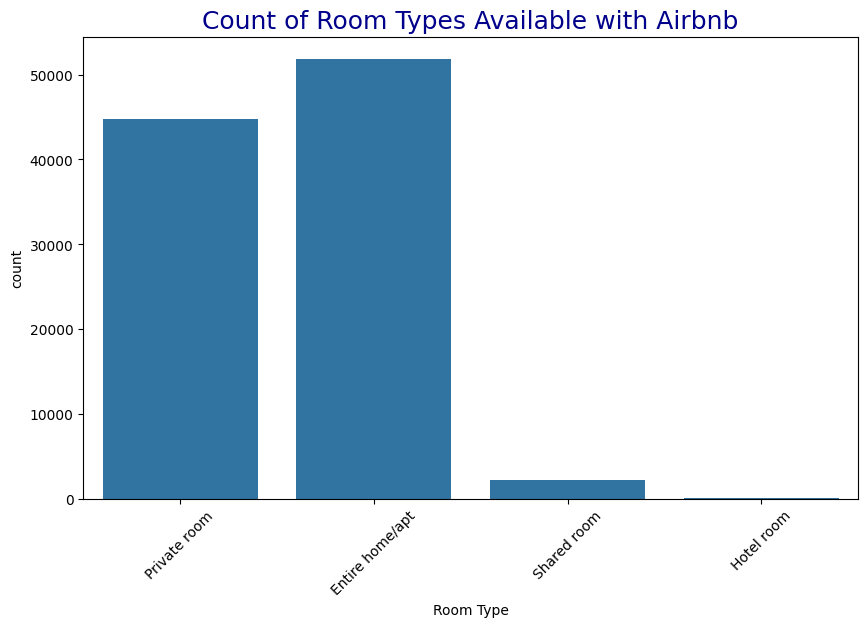

In [116]:
# Clustered columns chart
# Count plot for room types
sns.countplot(x="room_type", data=data)
plt.xticks(rotation=45)


# Labeling the plot
plt.xlabel("Room Type")
plt.title("Count of Room Types Available with Airbnb", color='darkblue', fontsize=18)

# Display the plot
plt.show()

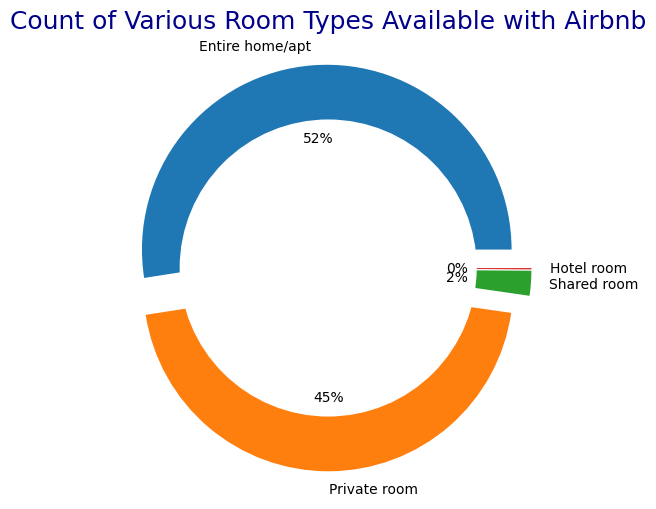

In [117]:
# Donut Chart

# Labels and values for room types
labels = ['Entire home/apt', 'Private room', 'Shared room', 'Hotel room']
values = data['room_type'].value_counts()
explode = [0.1, 0.1, 0.1, 0.1]
my_circle = plt.Circle((0, 0), 0.8, color='white')

# Plotting the pie chart
plt.pie(values, labels=labels, explode=explode, autopct='%.0f%%')

# Adding the white circle for the donut effect
p = plt.gcf()
p.gca().add_artist(my_circle)

# Title
plt.title("Count of Various Room Types Available with Airbnb", color='darkblue', fontsize=18)

# Show plot
plt.show()
plt.show()

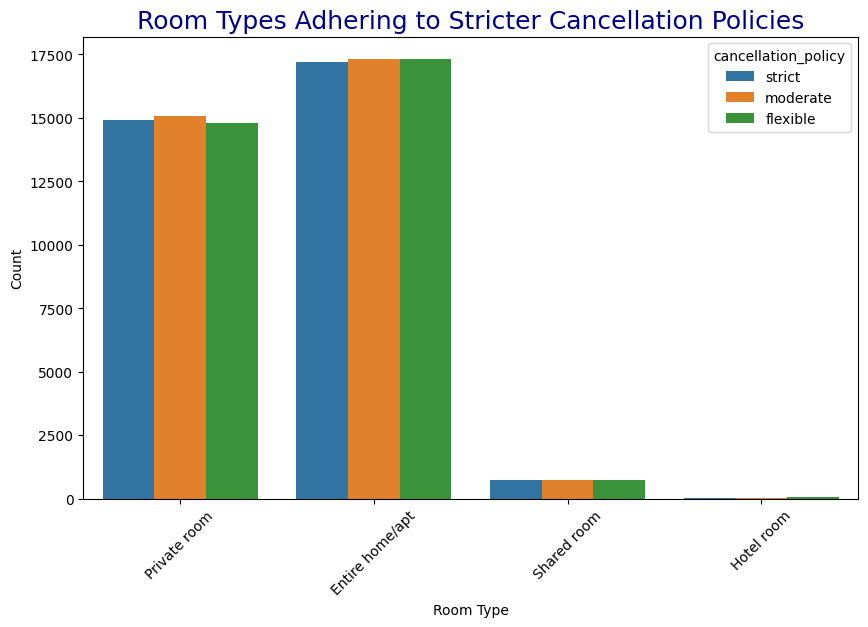

In [118]:
# Count plot with hue for cancellation policies
sns.countplot(x="room_type", hue='cancellation_policy', data=data)
plt.xticks(rotation=45)

# Labels and title
plt.xlabel("Room Type")
plt.ylabel("Count")
plt.title("Room Types Adhering to Stricter Cancellation Policies", color='darkblue', fontsize=18)

# Show plot
plt.show()

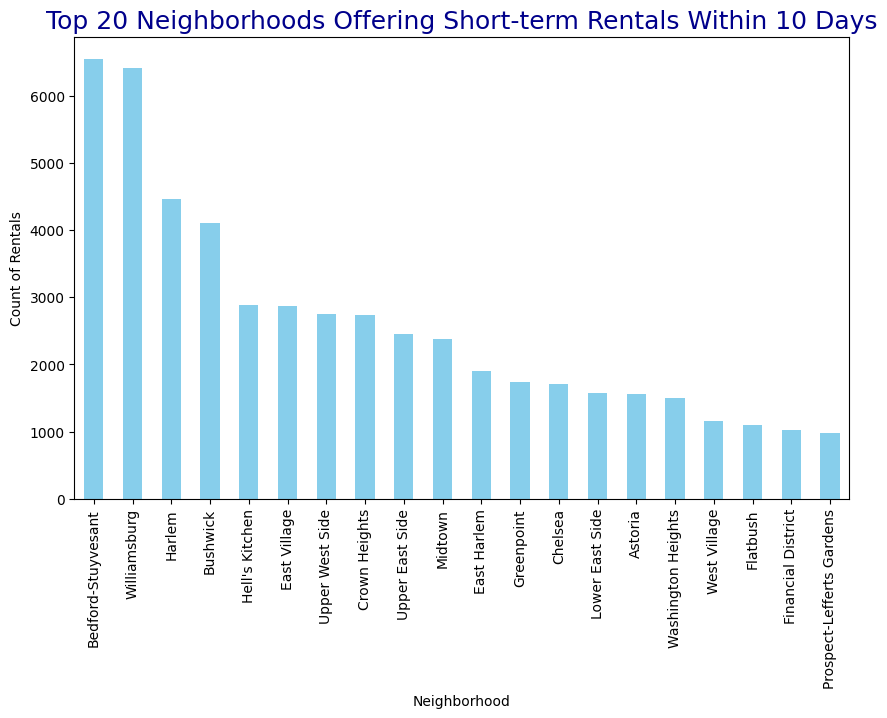

In [119]:
# Filtering: Filtered rows where minimum_nights <= 10.
# Grouping and Counting: Grouped by neighborhood and counted the number of rentals.
# Bar Plot: Visualized the top 20 neighborhoods using a bar plot.

# Filter for short-term rentals with minimum nights <= 10
plt.xticks(rotation=45)
filter_10Days = data.minimum_nights <= 10
filtered_data = data[filter_10Days]

# Group by 'neighbourhood' and count occurrences
neighbourhood_counts = filtered_data.groupby('neighbourhood')['neighbourhood'].count().nlargest(20)

# Bar plot for top 20 neighborhoods
neighbourhood_counts.plot(kind='bar', color='skyblue')

# Title
plt.title('Top 20 Neighborhoods Offering Short-term Rentals Within 10 Days', color='darkblue', fontsize=18)

# Label axes
plt.xlabel('Neighborhood')
plt.ylabel('Count of Rentals')

# Show plot
plt.show()

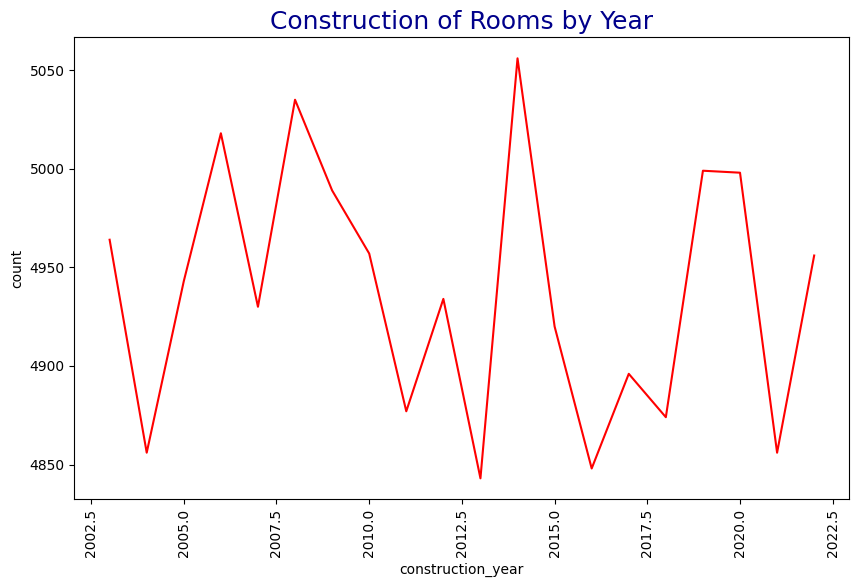

In [120]:
# Group by 'construction_year' and count rooms
construction_year_counts = data.groupby('construction_year').size().reset_index(name='count')
plt.xticks(rotation=45)

# Line plot for construction of rooms by year
sns.lineplot(x='construction_year', y='count', data=construction_year_counts, color="red")

# Rotate x-axis labels
plt.xticks(rotation=90)

# Title
plt.title('Construction of Rooms by Year', color='darkblue', fontsize=18)

# Show plot
plt.show()

Explaination of above plot:

- It looks like there were fluctuations in the number of rooms constructed each year.
- There were some years with a high number of rooms constructed, and others with a lower number.
- Overall, the trend is not very clear - it seems to go up and down without a consistent pattern.